In [33]:
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline
import statistics as sts
from scipy.stats import pearsonr
from sklearn import preprocessing
import seaborn as sns

Загрузить датасет по url:


In [4]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [5]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

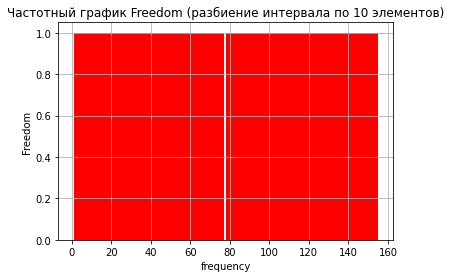

In [11]:
plt.hist(df['Freedom'], bins=len(df.Freedom), facecolor='r')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

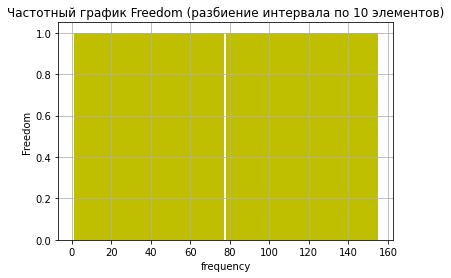

In [10]:
plt.hist(df['Positive affect'], bins=len(df['Positive affect']), facecolor='y')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Два верхних распределения - равномерные.
Вероятность выпадения каждого значения - одинакова. (Все значения встречаются только 1 раз)

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [12]:
df.Freedom.describe()

count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: Freedom, dtype: float64

In [17]:
print(
    f'Медиана: {sts.median(df.Freedom)} \n'
    f'Мода: {df.Freedom.mode()} \n'
    f'Среднее арифметическое: {df.Freedom.mean()} \n'
    f'Стандартное отклонение: {df.Freedom.std()} \n'
    f'Дисперсия: {df.Freedom.var()} \n'
    f'Минимум и максимум: {df.Freedom.min()} - {df.Freedom.max()} \n'
)

Медиана: 71.0 
Мода: 0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
150    151.0
151    152.0
152    153.0
153    154.0
154    155.0
Length: 155, dtype: float64 
Среднее арифметическое: 78.0 
Стандартное отклонение: 44.88875137492688 
Дисперсия: 2015.0 
Минимум и максимум: 1.0 - 155.0 



Почему нельзя найти моду?
Ответ: моды нет, т.к. все значения уникальны - повторяются 1 раз

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

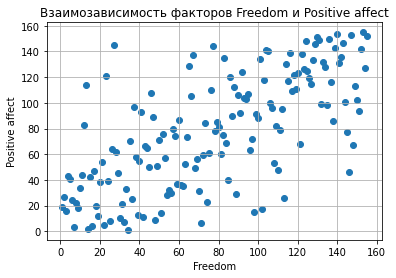

In [18]:
plt.scatter(df['Freedom'], df['Positive affect'])

plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Взаимозависимость факторов Freedom и Positive affect')
plt.grid(True)
plt.show()

# Судя по графику переменные связаны средней положительной корреляцией

In [21]:
x = df['Freedom'].dropna()
y = df['Positive affect'].dropna()


corr, p_value = pearsonr(x, y)
print(
    f'Коэффициент корреляции Пирсона: {corr} \n'
    f'P-value: {p_value}'
)

# P-value значительно меньше 0.05, поэтому у нас есть основания отклонить нулевую гипотезу о том,
# что корреляция между переменными отсутствует.

# Применение критерия Пирсона уместо - исходя из графика зависимость между переменными линейна и возрастание монотонно.
# Коэффициент корреляции - 0,68 - зависимость положительна (с возрастанием значений одной переменной, возрастают и значения другой),
# сила зависимость - средняя.

Коэффициент корреляции Пирсона: 0.6817698430601657 
P-value: 1.5956279484809605e-22


Нормализовать данные колонки Freedom (централизация + масштабирование)

<AxesSubplot:>

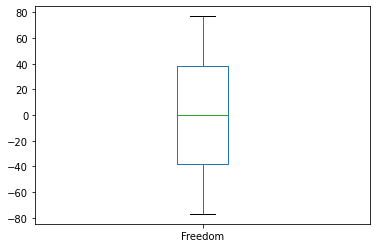

In [22]:
freedom = df['Freedom']
freedom_center = freedom - freedom.mean()
freedom_center.plot(kind='box')

In [23]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_scaled = min_max_scaler.fit_transform(np.array(freedom_center).reshape(-1, 1))
print(min(freedom_scaled))
print(max(freedom_scaled))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

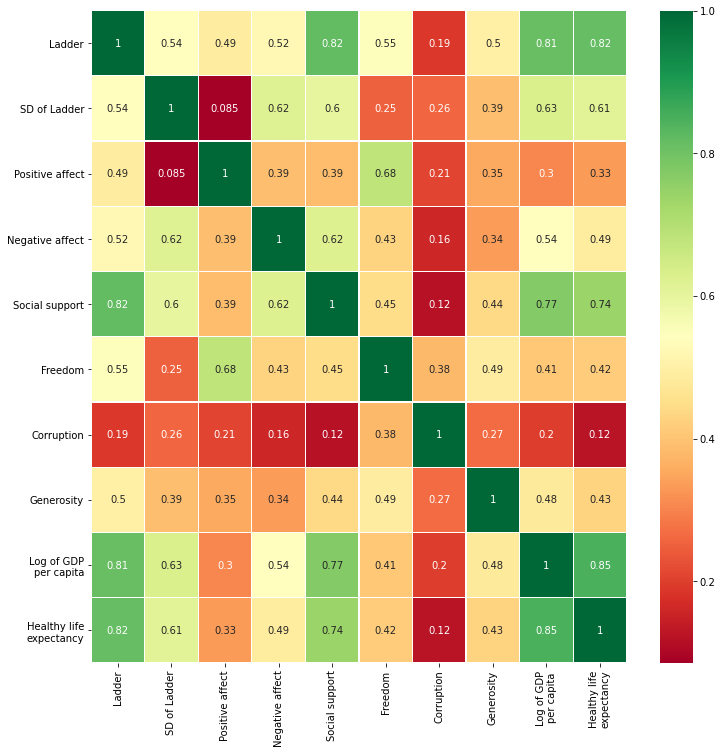

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()


Загрузить таблицу цен на авокадо: 

In [37]:
avocado_df=pd.read_csv('avocado.csv')
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

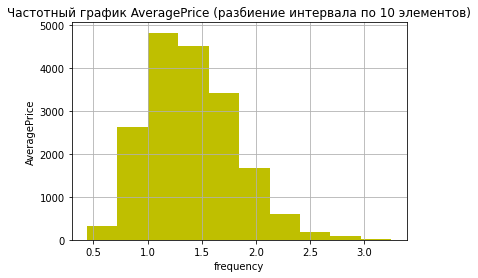

In [38]:
plt.hist(avocado_df['AveragePrice'], facecolor='y')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

# распределение цен похоже на нормальное или распределение стьюдента

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price.
Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

<AxesSubplot:>

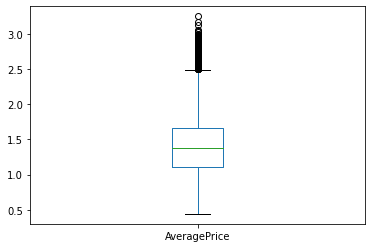

In [63]:
avocado_df.AveragePrice.plot(kind='box')

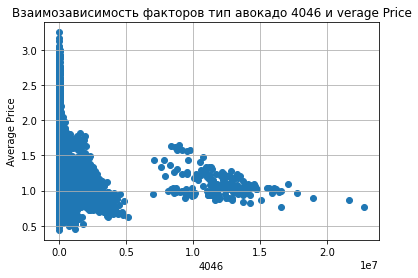

In [39]:
plt.scatter(avocado_df['4046'], avocado_df['AveragePrice'])

plt.xlabel('4046')
plt.ylabel('Average Price')
plt.title('Взаимозависимость факторов тип авокадо 4046 и verage Price')
plt.grid(True)
plt.show()

# Исходя из графика можно предположить,что зависимость скорее всего не линейная.

In [40]:
x = avocado_df['4046'].dropna()
y = avocado_df['AveragePrice'].dropna()


corr, p_value = pearsonr(x, y)
print(
    f'Коэффициент корреляции Пирсона: {corr} \n'
    f'P-value: {p_value}'
)

Коэффициент корреляции Пирсона: -0.20831704848788463 
P-value: 4.594934299445524e-178


In [47]:
coef, p = st.spearmanr(avocado_df['4046'], avocado_df['AveragePrice'])
print(
    f'Коэффициент корреляции Пирсона: {coef} \n'
    f'P-value: {p}'
)

#Коэффициент Спирмана дает более высокий показатель корреляции

Коэффициент корреляции Пирсона: -0.5961701841279068 
P-value: 0.0


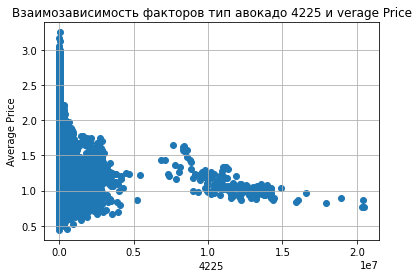

In [54]:
plt.scatter(avocado_df['4225'], avocado_df['AveragePrice'])

plt.xlabel('4225')
plt.ylabel('Average Price')
plt.title('Взаимозависимость факторов тип авокадо 4225 и verage Price')
plt.grid(True)
plt.show()


In [55]:
x = avocado_df['4225'].dropna()
y = avocado_df['AveragePrice'].dropna()


corr, p_value = pearsonr(x, y)
print(
    f'Коэффициент корреляции Пирсона: {corr} \n'
    f'P-value: {p_value}'
)

Коэффициент корреляции Пирсона: -0.17292777250933566 
P-value: 1.724597192741305e-122


In [56]:
coef, p = st.spearmanr(avocado_df['4225'], avocado_df['AveragePrice'])
print(
    f'Коэффициент корреляции Пирсона: {coef} \n'
    f'P-value: {p}'
)

Коэффициент корреляции Пирсона: -0.5137317111506706 
P-value: 0.0


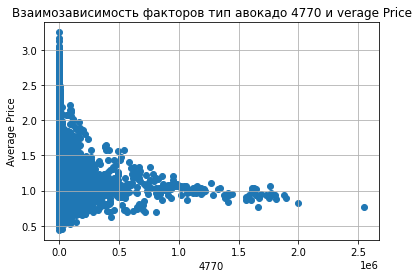

In [57]:
plt.scatter(avocado_df['4770'], avocado_df['AveragePrice'])

plt.xlabel('4770')
plt.ylabel('Average Price')
plt.title('Взаимозависимость факторов тип авокадо 4770 и verage Price')
plt.grid(True)
plt.show()


In [58]:
x = avocado_df['4770'].dropna()
y = avocado_df['AveragePrice'].dropna()


corr, p_value = pearsonr(x, y)
print(
    f'Коэффициент корреляции Пирсона: {corr} \n'
    f'P-value: {p_value}'
)

Коэффициент корреляции Пирсона: -0.17944598397976452 
P-value: 6.733646693440773e-132


In [59]:
coef, p = st.spearmanr(avocado_df['4770'], avocado_df['AveragePrice'])
print(
    f'Коэффициент корреляции Пирсона: {coef} \n'
    f'P-value: {p}'
)

Коэффициент корреляции Пирсона: -0.5328254290377853 
P-value: 0.0


Вывод: с возрастанием количества авокадо уменьшается средняя цена вне зависимости от сорта,
но эта зависимость не линейна.
Исходя из данных визуализации соотнешения количества авокадо и средней цены вывод можно переформулировать
- средняя цена при большем количестве ниже, чем средняя цена при меньшем количестве